## Keras Neural Network Classification

This notebook demonstrates a basic classification task
using a neural network implemented with Keras.

### Key Concepts
- Data preprocessing
- Neural network architecture
- Model training and evaluation
- Accuracy and loss visualization


In [2]:
import tensorflow as tf
from tensorflow.keras import layers,models
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Classification: MNIST dataset

(train_img,train_label),(test_img,test_label) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [6]:
#normalize images
train_img = train_img / 255.0
test_img = test_img / 255.0

In [8]:
#reshape images
train_img = train_img.reshape((train_img.shape[0],28,28,1))
test_img = test_img.reshape((test_img.shape[0],28,28,1))

#keras expects 3d input for CNN

In [11]:
#each layer stacked one after another:sequential
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),  #adds 32 filters
    layers.MaxPooling2D((2,2)),  #reduce spatial dimentions

    #second layer 64 filters
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),

    #output with 10 neurons(0-9)
    #softmax is used for multiclass classification
    layers.Dense(10,activation='softmax')
])

In [12]:
#compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  #suitable for multiclass classification where target is single integer
              metrics = ['accuracy'])

In [13]:
model.fit(train_img,train_label,epochs=5,batch_size=64)


Epoch 1/5
938/938 [==============================] - 35s 36ms/step - loss: 0.1809 - accuracy: 0.9456
Epoch 2/5
938/938 [==============================] - 31s 32ms/step - loss: 0.0522 - accuracy: 0.9844
Epoch 3/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0379 - accuracy: 0.9882
Epoch 4/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0288 - accuracy: 0.9908
Epoch 5/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0226 - accuracy: 0.9929


In [14]:
test_loss , test_acc = model.evaluate(test_img,test_label)
print(f'Test accuracy: {test_acc*100:.2f}%')

313/313 [==============================] - 3s 9ms/step - loss: 0.0402 - accuracy: 0.9881
Test accuracy: 98.81%


In [15]:
#predictions
predictions = model.predict(test_img)
predicted_digit = np.argmax(predictions[0])
print(f'Predicted digit: {predicted_digit}')

313/313 [==============================] - 3s 9ms/step
Predicted digit: 7


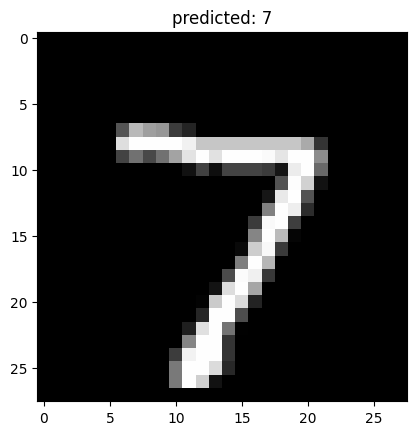

In [16]:
plt.imshow(test_img[0].reshape(28,28),cmap='gray')
plt.title(f'predicted: {predicted_digit}')
plt.show()